# PYTORCH

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#import logger
import torch.utils.data as data_utils
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from collections import OrderedDict
import os
import time

In [2]:
print(torch.__version__)

1.7.0


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
CUDA = torch.cuda.is_available()
print(CUDA)

True


In [4]:
# Hyper-parameters
sequence_length = 45 # height img
input_size = 45 # width img
hidden_size = 128
num_layers = 2
num_classes = 10
BATCH_SIZE = 256
NUM_WORKERS = 4
EPOCH_NUM = 100
LR = 0.001
SAVE_PATH = 'saved_model'

In [5]:
'''
miu, sigma = 127.5, 127.5
data_num = 60000 #The number of figures
fig_w = 45 

train_data = np.fromfile('mnist/mnist_train/mnist_train_data', dtype=np.uint8)
train_label = np.fromfile('mnist/mnist_train/mnist_train_label', dtype=np.uint8)

test_data = np.fromfile('mnist/mnist_test/mnist_test_data', dtype=np.uint8)
test_label = np.fromfile('mnist/mnist_test/mnist_test_label', dtype=np.uint8)
'''

"\nmiu, sigma = 127.5, 127.5\ndata_num = 60000 #The number of figures\nfig_w = 45 \n\ntrain_data = np.fromfile('mnist/mnist_train/mnist_train_data', dtype=np.uint8)\ntrain_label = np.fromfile('mnist/mnist_train/mnist_train_label', dtype=np.uint8)\n\ntest_data = np.fromfile('mnist/mnist_test/mnist_test_data', dtype=np.uint8)\ntest_label = np.fromfile('mnist/mnist_test/mnist_test_label', dtype=np.uint8)\n"

In [6]:
'''
train_data = (train_data - miu) / sigma
print(np.max(train_data), np.min(train_data))

train_data = np.reshape(train_data, newshape=(data_num, 1, fig_w, fig_w))
train_data = train_data.astype(np.float32)
# print(np.max(train_data), len(train_data))
# print(np.max(train_label), len(train_label))

train_data = torch.from_numpy(train_data)
train_label = torch.from_numpy(train_label)
train_dataset = data_utils.TensorDataset(data_tensor=train_data, target_tensor=train_label)
'''

'\ntrain_data = (train_data - miu) / sigma\nprint(np.max(train_data), np.min(train_data))\n\ntrain_data = np.reshape(train_data, newshape=(data_num, 1, fig_w, fig_w))\ntrain_data = train_data.astype(np.float32)\n# print(np.max(train_data), len(train_data))\n# print(np.max(train_label), len(train_label))\n\ntrain_data = torch.from_numpy(train_data)\ntrain_label = torch.from_numpy(train_label)\ntrain_dataset = data_utils.TensorDataset(data_tensor=train_data, target_tensor=train_label)\n'

In [7]:
'''
test_data = (test_data - miu) / sigma
print(np.max(test_data), np.min(test_data))

test_data = np.reshape(test_data, newshape=(10000, 1, fig_w, fig_w))
test_data = test_data.astype(np.float32)
print(len(test_data))
# print(np.max(train_data), len(train_data))
# print(np.max(train_label), len(train_label))

test_data = torch.from_numpy(test_data)
test_label = torch.from_numpy(test_label)
test_dataset = data_utils.TensorDataset(data_tensor=test_data, target_tensor=test_label)
'''

'\ntest_data = (test_data - miu) / sigma\nprint(np.max(test_data), np.min(test_data))\n\ntest_data = np.reshape(test_data, newshape=(10000, 1, fig_w, fig_w))\ntest_data = test_data.astype(np.float32)\nprint(len(test_data))\n# print(np.max(train_data), len(train_data))\n# print(np.max(train_label), len(train_label))\n\ntest_data = torch.from_numpy(test_data)\ntest_label = torch.from_numpy(test_label)\ntest_dataset = data_utils.TensorDataset(data_tensor=test_data, target_tensor=test_label)\n'

In [8]:
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        return torch.reshape(img, self.new_size)

In [9]:
mnist_transforms=[
            transforms.Resize((input_size, sequence_length)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),]
            #ReshapeTransform((45,45))]

train_dataset = datasets.MNIST('dataset', train=True, download=True, transform=transforms.Compose(mnist_transforms))
test_dataset = datasets.MNIST('dataset', train=False, transform=transforms.Compose(mnist_transforms))

#train_tensor = data_utils.TensorDataset(train_dataset.data, train_dataset.targets) 
#test_tensor = data_utils.TensorDataset(test_dataset.data, test_dataset.targets) 

train_loader = data_utils.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, drop_last=True)
test_loader = data_utils.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, drop_last=True)

In [10]:
#train_data = train_dataset.data.cpu().numpy()
#train_data = np.resize(train_data,(60000,1,45,45))
print(train_dataset.data.shape)
print(test_dataset.data.shape)
#print(len(train_tensor), train_tensor[0][0].shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [11]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(type(images))
print(type(labels))
print(images.shape)
print(labels.shape)

dataiter = iter(test_loader)
images, labels = dataiter.next()
print(type(images))
print(type(labels))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([256, 1, 45, 45])
torch.Size([256])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([256, 1, 45, 45])
torch.Size([256])


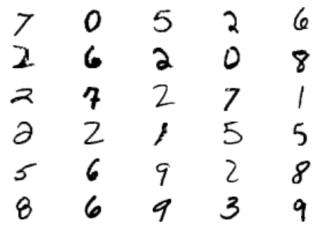

In [12]:
figure = plt.figure()
for index in range(1, 31):
    plt.subplot(6, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [13]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(-1, x.size(1) * x.size(2) * x.size(3))

In [14]:
# The baseline model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = Flatten()
        self.conv1 = nn.Conv2d(1, 10, padding=1, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, padding=1, kernel_size=3)
        self.conv2_drop_batch = nn.Sequential(
            nn.BatchNorm2d(20),
            nn.Dropout2d(inplace=True)
        )
        self.conv3 = nn.Conv2d(20, 40, padding=1, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, padding=1, kernel_size=3)
        self.conv4_drop_batch = nn.Sequential(
            nn.BatchNorm2d(80),
            nn.Dropout2d(inplace=True, p=0.5)
        )
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal(m.weight, mode='fan_out')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant(m.weight, 1)
                nn.init.constant(m.bias, 0)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop_batch(self.conv2(x)), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(F.max_pool2d(self.conv4_drop_batch(self.conv4(x)), 2))
#         print(x.size())
        x = self.flatten(x) #x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [15]:
# Training function for baseline net and AttNet, but NOT for RecNet
def train(train_loader, model, criterion, optimizer, epoch):
    load_time = 0
    batch_time = 0
        
    cumul_loss = 0
    cumul_acc = 0
    end = time.time()
    for i, (batch_inputs, batch_labels) in enumerate(train_loader):
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        load_time += time.time() - end
        
        batch_logits = model(batch_inputs)
        loss = criterion(batch_logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, pred = torch.max(batch_logits, dim=1)
        acc = torch.mean(torch.eq(pred, batch_labels).float())
        
        cumul_loss += loss
        cumul_acc += acc
        
        batch_time += time.time() - end
        end = time.time()
    
    avg_loss = cumul_loss / len(train_loader)
    avg_loss = avg_loss.data.cpu().numpy()
    avg_acc = cumul_acc / len(train_loader)
    avg_acc = avg_acc.data.cpu().numpy()
    
    return avg_loss, avg_acc, load_time, batch_time

In [16]:
def validate(data_loader, model, criterion):
    cumul_loss = 0.
    cumul_acc = 0.
    for i, (batch_inputs, batch_labels) in enumerate(data_loader):
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        
        batch_logits = model(batch_inputs)
        loss = criterion(batch_logits, batch_labels)
        _, pred = torch.max(batch_logits, dim=1)
#         print("Pred, ", pred)
        acc = torch.mean(torch.eq(pred, batch_labels).float())
#         print("Acc, ", acc)
        
        cumul_loss += loss
        cumul_acc += acc
    
    avg_loss = cumul_loss / len(data_loader)
    avg_acc = cumul_acc / len(data_loader)
#     print("Hey: ", avg_loss.data.cpu().numpy()[0], avg_acc)
    
    return avg_loss.data.cpu().numpy(), avg_acc.data.cpu().numpy()

In [17]:
base_net = Net().to(device)

#summary(base_net, (1, 45, 45))
print(base_net)

/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


Net(
  (flatten): Flatten()
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop_batch): Sequential(
    (0): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout2d(p=0.5, inplace=True)
  )
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_drop_batch): Sequential(
    (0): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout2d(p=0.5, inplace=True)
  )
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [18]:
# batch_inputs, batch_labels = next(iter(train_loader))
# batch_inputs = Variable(batch_inputs)
# batch_labels = Variable(batch_labels)
# if CUDA:
#     batch_inputs = batch_inputs.cuda()
#     batch_labels = batch_labels.cuda()
# print(torch.max(base_net(batch_inputs), dim=1)[0])
# print(base_net(batch_inputs))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(base_net.parameters(), lr=LR)
test_interval = 3
decay_interval = 10

In [19]:
for epoch in range(EPOCH_NUM):
    decay_times = epoch // decay_interval
    lr = LR * 0.1 ** decay_times
    for para_group in optimizer.param_groups:
        para_group['lr'] = lr
    
    avg_loss, avg_acc, load_time, batch_time = train(train_loader, base_net, criterion, optimizer, epoch)
    print("Epoch {}, Lr {}, Loss: {}, Acc: {}, load_time: {}, batch_time: {}".format(epoch+1, lr, avg_loss, avg_acc, load_time, batch_time))
    
    if (epoch+1) % test_interval == 0:
        save_path = os.path.join(SAVE_PATH, 'base_net')
        if not os.path.isdir(save_path):
            os.makedirs(save_path)
        file_name = os.path.join(save_path, 'base_net_' + str(epoch)+'.pth')
        torch.save({
            'epoch': epoch,
            'lr': lr,
            'model_state': base_net.state_dict(),
            'optimizer_state': optimizer.state_dict()
        }, file_name)
        print('Model saved at '+file_name)

        print("Testing...")
        test_loss, test_acc = validate(test_loader, base_net, criterion)
        print("Loss {}, Acc {}".format(test_loss, test_acc))

Epoch 1, Lr 0.001, Loss: 0.9864256978034973, Acc: 0.6723424196243286, load_time: 1.5134320259094238, batch_time: 2.500523805618286
Epoch 2, Lr 0.001, Loss: 0.305684357881546, Acc: 0.9112246632575989, load_time: 1.5707566738128662, batch_time: 2.5177855491638184
Epoch 3, Lr 0.001, Loss: 0.21989336609840393, Acc: 0.9381176829338074, load_time: 1.5285849571228027, batch_time: 2.4163224697113037
Model saved at saved_model/base_net/base_net_2.pth
Testing...
Loss 0.18477174639701843, Acc 0.9486178159713745
Epoch 4, Lr 0.001, Loss: 0.17655028402805328, Acc: 0.949786365032196, load_time: 1.5378096103668213, batch_time: 2.5095396041870117
Epoch 5, Lr 0.001, Loss: 0.1564711183309555, Acc: 0.9555956721305847, load_time: 1.5480928421020508, batch_time: 2.519937753677368
Epoch 6, Lr 0.001, Loss: 0.14143721759319305, Acc: 0.9602698087692261, load_time: 1.7050678730010986, batch_time: 2.937039375305176
Model saved at saved_model/base_net/base_net_5.pth
Testing...
Loss 0.11754779517650604, Acc 0.96644

Epoch 47, Lr 1.0000000000000002e-07, Loss: 0.07881256937980652, Acc: 0.9777644872665405, load_time: 1.5623064041137695, batch_time: 2.480292797088623
Epoch 48, Lr 1.0000000000000002e-07, Loss: 0.07997236400842667, Acc: 0.9771468043327332, load_time: 1.573873519897461, batch_time: 2.4429028034210205
Model saved at saved_model/base_net/base_net_47.pth
Testing...
Loss 0.0843532606959343, Acc 0.977463960647583
Epoch 49, Lr 1.0000000000000002e-07, Loss: 0.07629638910293579, Acc: 0.9780983328819275, load_time: 1.57667875289917, batch_time: 2.4408979415893555
Epoch 50, Lr 1.0000000000000002e-07, Loss: 0.07937992364168167, Acc: 0.9773638248443604, load_time: 1.5972504615783691, batch_time: 2.5217912197113037
Epoch 51, Lr 1.0000000000000004e-08, Loss: 0.07804642617702484, Acc: 0.9777477979660034, load_time: 1.5799217224121094, batch_time: 2.4518589973449707
Model saved at saved_model/base_net/base_net_50.pth
Testing...
Loss 0.08343271911144257, Acc 0.9757612347602844
Epoch 52, Lr 1.000000000000

Loss 0.08767980337142944, Acc 0.9753605723381042
Epoch 91, Lr 1.0000000000000006e-12, Loss: 0.08071491122245789, Acc: 0.9774807095527649, load_time: 1.545274019241333, batch_time: 2.4265897274017334
Epoch 92, Lr 1.0000000000000006e-12, Loss: 0.0795406699180603, Acc: 0.9767294526100159, load_time: 1.543233871459961, batch_time: 2.428992748260498
Epoch 93, Lr 1.0000000000000006e-12, Loss: 0.07894479483366013, Acc: 0.9774807095527649, load_time: 1.5114619731903076, batch_time: 2.517087936401367
Model saved at saved_model/base_net/base_net_92.pth
Testing...
Loss 0.08115922659635544, Acc 0.977463960647583
Epoch 94, Lr 1.0000000000000006e-12, Loss: 0.08024385571479797, Acc: 0.9774472713470459, load_time: 1.5592334270477295, batch_time: 2.4666616916656494
Epoch 95, Lr 1.0000000000000006e-12, Loss: 0.07874871790409088, Acc: 0.9775641560554504, load_time: 1.5419034957885742, batch_time: 2.4733293056488037
Epoch 96, Lr 1.0000000000000006e-12, Loss: 0.07816220074892044, Acc: 0.9778145551681519, l

In [20]:
class RecNet(nn.Module):
    def __init__(self):
        super(RecNet, self).__init__()
        self.flatten = Flatten()
        self.conv1 = nn.Conv2d(1, 10, padding=1, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, padding=1, kernel_size=3)
        self.conv2_drop_batch = nn.Sequential(
            nn.BatchNorm2d(20),
            nn.Dropout2d(inplace=True)
        )
        self.conv3 = nn.Conv2d(20, 40, padding=1, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, padding=1, kernel_size=3)
        self.conv4_drop_batch = nn.Sequential(
            nn.BatchNorm2d(80),
            nn.Dropout2d(inplace=True)
        )
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        self.deconv1 = nn.ConvTranspose2d(80, 40, padding=0, stride=2, kernel_size=3)
        self.deconv1_bn = nn.BatchNorm2d(40)
        self.deconv2 = nn.ConvTranspose2d(40, 20, padding=0, stride=2, kernel_size=3)
        self.deconv3 = nn.ConvTranspose2d(20, 10, padding=0, stride=2, kernel_size=2)
        self.deconv3_bn = nn.BatchNorm2d(10)
        self.deconv4 = nn.ConvTranspose2d(10, 1, padding=0, stride=2, kernel_size=3)
        
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                nn.init.kaiming_normal(m.weight, mode='fan_out')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant(m.weight, 1)
                nn.init.constant(m.bias, 0)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop_batch(self.conv2(x)), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(F.max_pool2d(self.conv4_drop_batch(self.conv4(x)), 2))
#         print(x.size())
        x_ft = self.flatten(x) #x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x_ft = F.relu(self.fc1(x_ft))
        x_ft = F.dropout(x_ft, training=self.training)
        logits = self.fc2(x_ft)
        
        x_rec = F.relu(self.deconv1_bn(self.deconv1(x)))
        x_rec = F.relu(self.deconv2(x_rec))
        x_rec = F.relu(self.deconv3_bn(self.deconv3(x_rec)))
        x_rec = F.tanh(self.deconv4(x_rec))
        return logits, x_rec

In [21]:
class RecCrossEntropyLoss(nn.Module):
    def __init__(self, rec_ratio):
        super(RecCrossEntropyLoss, self).__init__()
        self.rec_ratio = rec_ratio
    
    def forward(self, rec, inputs, logits, targets):
        rec_loss = nn.MSELoss()
        cls_loss = nn.CrossEntropyLoss()
        
        return cls_loss(logits, targets) + self.rec_ratio * rec_loss(rec, inputs)

In [22]:
# Training function for RecNet, but NOT for baseline net and AttNet
def train_rec(train_loader, model, criterion, optimizer, epoch):
    load_time = 0
    batch_time = 0
        
    cumul_loss = 0
    cumul_acc = 0
    end = time.time()
    for i, (batch_inputs, batch_labels) in enumerate(train_loader):
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        load_time += time.time() - end
        
        batch_logits, batch_recs = model(batch_inputs)
        loss = criterion(batch_recs, batch_inputs, batch_logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, pred = torch.max(batch_logits, dim=1)
        acc = torch.mean(torch.eq(pred, batch_labels).float())
        
        cumul_loss += loss
        cumul_acc += acc
        
        batch_time += time.time() - end
        end = time.time()
    
    avg_loss = cumul_loss / len(train_loader)
    avg_loss = avg_loss.data.cpu().numpy()
    avg_acc = cumul_acc / len(train_loader)
    avg_acc = avg_acc.data.cpu().numpy()
    
    return avg_loss, avg_acc, load_time, batch_time

In [23]:
# Val function for RecNet, but NOT for baseline net and AttNet
def validate_rec(data_loader, model, criterion):
    cumul_loss = 0.
    cumul_acc = 0.
    for i, (batch_inputs, batch_labels) in enumerate(data_loader):
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        
        batch_logits, batch_recs = model(batch_inputs)
        loss = criterion(batch_recs, batch_inputs, batch_logits, batch_labels)
        _, pred = torch.max(batch_logits, dim=1)
#         print("Pred, ", pred)
        acc = torch.mean(torch.eq(pred, batch_labels).float())
#         print("Acc, ", acc)
        
        cumul_loss += loss
        cumul_acc += acc
    
    avg_loss = cumul_loss / len(data_loader)
    avg_acc = cumul_acc / len(data_loader)
#     print("Hey: ", avg_loss.data.cpu().numpy()[0], avg_acc)
    
    return avg_loss.data.cpu().numpy(), avg_acc.data.cpu().numpy()

In [24]:
rec_net = RecNet().to(device)

#summary(rec_net, (1, 45, 45))
print(rec_net)

RecNet(
  (flatten): Flatten()
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop_batch): Sequential(
    (0): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout2d(p=0.5, inplace=True)
  )
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_drop_batch): Sequential(
    (0): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout2d(p=0.5, inplace=True)
  )
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
  (deconv1): ConvTranspose2d(80, 40, kernel_size=(3, 3), stride=(2, 2))
  (deconv1_bn): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv2): ConvTranspose2d(40, 20, ke

/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


In [25]:
rec_ratio = 0.5
criterion = RecCrossEntropyLoss(rec_ratio)
rec_optimizer = torch.optim.Adam(rec_net.parameters(), lr=LR)
test_interval = 3
decay_interval = 10

In [26]:
for epoch in range(EPOCH_NUM):
    decay_times = epoch // decay_interval
    lr = LR * 0.1 ** decay_times
    for para_group in rec_optimizer.param_groups:
        para_group['lr'] = lr
    
    avg_loss, avg_acc, load_time, batch_time = train_rec(train_loader, rec_net, criterion, rec_optimizer, epoch)
    print("Epoch {}, Lr {}, Loss: {}, Acc: {}, load_time: {}, batch_time: {}".format(epoch+1, lr, avg_loss, avg_acc, load_time, batch_time))
    
    if (epoch+1) % test_interval == 0:
        save_path = os.path.join(SAVE_PATH, 'rec_net')
        if not os.path.isdir(save_path):
            os.makedirs(save_path)
        file_name = os.path.join(save_path, 'rec_net_' + str(epoch)+'.pth')
        torch.save({
            'epoch': epoch,
            'lr': lr,
            'model_state': base_net.state_dict(),
            'optimizer_state': optimizer.state_dict()
        }, file_name)
        print('Model saved at '+file_name)

        print("Testing...")
        test_loss, test_acc = validate_rec(test_loader, rec_net, criterion)
        print("Loss {}, Acc {}".format(test_loss, test_acc))

/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1, Lr 0.001, Loss: 1.2822271585464478, Acc: 0.6636952757835388, load_time: 1.537672519683838, batch_time: 2.934788942337036
Epoch 2, Lr 0.001, Loss: 0.5031893253326416, Acc: 0.9171341061592102, load_time: 1.5320005416870117, batch_time: 2.9315481185913086
Epoch 3, Lr 0.001, Loss: 0.4078473448753357, Acc: 0.941256046295166, load_time: 1.5515732765197754, batch_time: 2.9331350326538086
Model saved at saved_model/rec_net/rec_net_2.pth
Testing...
Loss 0.3593692481517792, Acc 0.9544271230697632
Epoch 4, Lr 0.001, Loss: 0.36429306864738464, Acc: 0.9523738622665405, load_time: 1.4070374965667725, batch_time: 2.9385969638824463
Epoch 5, Lr 0.001, Loss: 0.33922305703163147, Acc: 0.9591346383094788, load_time: 1.4101333618164062, batch_time: 2.980900526046753
Epoch 6, Lr 0.001, Loss: 0.32588016986846924, Acc: 0.9612547159194946, load_time: 1.4782116413116455, batch_time: 2.9399166107177734
Model saved at saved_model/rec_net/rec_net_5.pth
Testing...
Loss 0.31439268589019775, Acc 0.967047274

Epoch 48, Lr 1.0000000000000002e-07, Loss: 0.25621578097343445, Acc: 0.9782819747924805, load_time: 1.6186082363128662, batch_time: 3.0024354457855225
Model saved at saved_model/rec_net/rec_net_47.pth
Testing...
Loss 0.26010334491729736, Acc 0.9781650900840759
Epoch 49, Lr 1.0000000000000002e-07, Loss: 0.25620439648628235, Acc: 0.9778980016708374, load_time: 1.5706970691680908, batch_time: 2.9944796562194824
Epoch 50, Lr 1.0000000000000002e-07, Loss: 0.2546358108520508, Acc: 0.9788328409194946, load_time: 1.6206018924713135, batch_time: 2.9953668117523193
Epoch 51, Lr 1.0000000000000004e-08, Loss: 0.257174551486969, Acc: 0.9778145551681519, load_time: 1.6376025676727295, batch_time: 3.008500814437866
Model saved at saved_model/rec_net/rec_net_50.pth
Testing...
Loss 0.26227134466171265, Acc 0.9766626954078674
Epoch 52, Lr 1.0000000000000004e-08, Loss: 0.2549174129962921, Acc: 0.9791166186332703, load_time: 1.5930678844451904, batch_time: 2.9834277629852295
Epoch 53, Lr 1.000000000000000

Epoch 92, Lr 1.0000000000000006e-12, Loss: 0.2551307678222656, Acc: 0.9780649542808533, load_time: 1.5212926864624023, batch_time: 3.1664342880249023
Epoch 93, Lr 1.0000000000000006e-12, Loss: 0.2555263042449951, Acc: 0.9777811765670776, load_time: 1.525688886642456, batch_time: 3.064206600189209
Model saved at saved_model/rec_net/rec_net_92.pth
Testing...
Loss 0.2638986110687256, Acc 0.9769631624221802
Epoch 94, Lr 1.0000000000000006e-12, Loss: 0.25547823309898376, Acc: 0.9785657525062561, load_time: 1.429114818572998, batch_time: 3.095949172973633
Epoch 95, Lr 1.0000000000000006e-12, Loss: 0.2559274435043335, Acc: 0.9780148863792419, load_time: 1.5334186553955078, batch_time: 3.119174003601074
Epoch 96, Lr 1.0000000000000006e-12, Loss: 0.25647440552711487, Acc: 0.9773805141448975, load_time: 1.5686633586883545, batch_time: 3.051884174346924
Model saved at saved_model/rec_net/rec_net_95.pth
Testing...
Loss 0.2663312256336212, Acc 0.9749599695205688
Epoch 97, Lr 1.0000000000000006e-12,

In [27]:
class AttentionNet(nn.Module):
    def __init__(self):
        super(AttentionNet, self).__init__()
        self.flatten = Flatten()
        self.conv1 = nn.Conv2d(1, 10, padding=1, kernel_size=3)
        self.attention1 = nn.Conv2d(1, 1, padding=1, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, padding=1, kernel_size=3)
        self.attention2 = nn.Conv2d(10, 1, padding=1, kernel_size=3)
        self.conv2_drop_batch = nn.Sequential(
            nn.BatchNorm2d(20),
            nn.Dropout2d(inplace=True)
        )
        self.conv3 = nn.Conv2d(20, 40, padding=1, kernel_size=3)
        self.attention3 = nn.Conv2d(20, 1, padding=1, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, padding=1, kernel_size=3)
        self.attention4 = nn.Conv2d(40, 1, padding=1, kernel_size=3)
        self.conv4_drop_batch = nn.Sequential(OrderedDict([
            ("Conv4_BN", nn.BatchNorm2d(80)),
            ("Conv4_Dropout", nn.Dropout2d(inplace=True))
        ]))
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
                nn.init.kaiming_normal(m.weight, mode='fan_out')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant(m.weight, 1)
                nn.init.constant(m.bias, 0)

    def forward(self, x):
        
        attention = F.sigmoid(self.attention1(x))
        x = self.conv1(x)
        x = x * attention
        x = F.relu(F.max_pool2d(x, 2))
        
        attention = F.sigmoid(self.attention2(x))
        x = self.conv2(x)
        x = x * attention
        x = F.relu(F.max_pool2d(self.conv2_drop_batch(x), 2))
        
        attention = F.sigmoid(self.attention3(x))
        x = self.conv3(x)
        x = x * attention
        x = F.relu(F.max_pool2d(x, 2))
        
        attention = F.sigmoid(self.attention4(x))
        x = self.conv4(x)
        x = x * attention
        x = F.relu(F.max_pool2d(self.conv4_drop_batch(x), 2))
#         print(x.size())

        x_ft = self.flatten(x) #x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x_ft = F.relu(self.fc1(x_ft))
        x_ft = F.dropout(x_ft, training=self.training)
        logits = self.fc2(x_ft)
        
        return logits

In [28]:
att_net = AttentionNet().to(device)

#summary(att_net, (1, 45, 45))
print(att_net)

AttentionNet(
  (flatten): Flatten()
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (attention1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (attention2): Conv2d(10, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop_batch): Sequential(
    (0): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout2d(p=0.5, inplace=True)
  )
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (attention3): Conv2d(20, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (attention4): Conv2d(40, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_drop_batch): Sequential(
    (Conv4_BN): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (Conv4_Dropout): Dropout2d(p=0.5

/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.


In [29]:
criterion = nn.CrossEntropyLoss()
att_optimizer = torch.optim.Adam(att_net.parameters(), lr=LR)
test_interval = 10
decay_interval = 30

In [30]:
for epoch in range(EPOCH_NUM):
    decay_times = epoch // decay_interval
    lr = LR * 0.1 ** decay_times
    for para_group in optimizer.param_groups:
        para_group['lr'] = lr
    
    avg_loss, avg_acc, load_time, batch_time = train(train_loader, att_net, criterion, att_optimizer, epoch)
    print("Epoch {}, Lr {}, Loss: {}, Acc: {}, load_time: {}, batch_time: {}".format(epoch+1, lr, avg_loss, avg_acc, load_time, batch_time))
    
    if (epoch+1) % test_interval == 0:
        save_path = os.path.join(SAVE_PATH, 'att_net')
        if not os.path.isdir(save_path):
            os.makedirs(save_path)
        file_name = os.path.join(save_path, 'att_net_' + str(epoch)+'.pth')
        torch.save({
            'epoch': epoch,
            'lr': LR,
            'model_state': base_net.state_dict(),
            'optimizer_state': optimizer.state_dict()
        }, file_name)
        print('Model saved at '+file_name)

        print("Testing...")
        test_loss, test_acc = validate(test_loader, att_net, criterion)
        print("Loss {}, Acc {}".format(test_loss, test_acc))

/home/jenazads/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1, Lr 0.001, Loss: 1.4390112161636353, Acc: 0.497896671295166, load_time: 2.0348918437957764, batch_time: 3.4088900089263916
Epoch 2, Lr 0.001, Loss: 0.4358982741832733, Acc: 0.8706597685813904, load_time: 2.0538270473480225, batch_time: 3.3801214694976807
Epoch 3, Lr 0.001, Loss: 0.2810536324977875, Acc: 0.9205061793327332, load_time: 2.167055130004883, batch_time: 3.4120590686798096
Epoch 4, Lr 0.001, Loss: 0.22059614956378937, Acc: 0.9390525221824646, load_time: 2.168855667114258, batch_time: 3.394044876098633
Epoch 5, Lr 0.001, Loss: 0.1866719126701355, Acc: 0.9474325776100159, load_time: 2.084399700164795, batch_time: 3.3810079097747803
Epoch 6, Lr 0.001, Loss: 0.16861900687217712, Acc: 0.9541767239570618, load_time: 2.1321563720703125, batch_time: 3.374870777130127
Epoch 7, Lr 0.001, Loss: 0.15626569092273712, Acc: 0.9574319124221802, load_time: 2.0442588329315186, batch_time: 3.3712968826293945
Epoch 8, Lr 0.001, Loss: 0.14269638061523438, Acc: 0.9600360989570618, load_tim

Epoch 59, Lr 0.0001, Loss: 0.04898004233837128, Acc: 0.9854934811592102, load_time: 1.9851295948028564, batch_time: 3.3796632289886475
Epoch 60, Lr 0.0001, Loss: 0.045094843953847885, Acc: 0.9863448739051819, load_time: 2.0677454471588135, batch_time: 3.397928237915039
Model saved at saved_model/att_net/att_net_59.pth
Testing...
Loss 0.06742829829454422, Acc 0.9828726053237915
Epoch 61, Lr 1.0000000000000003e-05, Loss: 0.046199068427085876, Acc: 0.9862614274024963, load_time: 2.094621419906616, batch_time: 3.382521390914917
Epoch 62, Lr 1.0000000000000003e-05, Loss: 0.04650794342160225, Acc: 0.9857105016708374, load_time: 2.081437110900879, batch_time: 3.359642267227173
Epoch 63, Lr 1.0000000000000003e-05, Loss: 0.04486030340194702, Acc: 0.9867120981216431, load_time: 2.042856216430664, batch_time: 3.385324478149414
Epoch 64, Lr 1.0000000000000003e-05, Loss: 0.046042755246162415, Acc: 0.9858607649803162, load_time: 2.1372716426849365, batch_time: 3.382300853729248
Epoch 65, Lr 1.000000

In [31]:
def visualize_attention(att_net, test_loader, save_path='results/', save_plot=False):
    for (batch_inputs, batch_labels) in test_loader:
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        plt.figure(figsize=[22, 10])
        for i in range(5):
            plt.subplot(5, 11, 1 + 11*i)
            if i == 0:
                plt.title('input')
            plt.axis('off')
            plt.imshow(-batch_inputs[i, 0].data.cpu().numpy(), cmap='Greys')
            oris, atts = get_attention(att_net, batch_inputs[i:(i+1)])
            for j, (ori, att) in enumerate(zip(oris, atts)):
                plt.subplot(5, 11, 2*j + 11 * i + 2)
                if i == 0:
                    plt.title('Original')
                tmp = ori.data.cpu().numpy()
                print(np.max(tmp[0,0]), np.min(tmp[0,0]))
                plt.axis('off')
                plt.imshow(tmp[0, 0], cmap='gray')
                
                plt.subplot(5, 11, 2*j + 11 * i + 3)
                if i == 0:
                    plt.title('Attented')
                tmp = att.data.cpu().numpy()
                    #       print(tmp.shape)
                plt.axis('off')
                plt.imshow(tmp[0, 0], cmap='gray')
        if save_plot:
            if not os.path.isdir(save_path):
                os.makedirs(save_path)
            plt.savefig(save_path+'attention.pdf', bbox_inches='tight')
        break

In [32]:
def get_attention(att_net, x):
        
    attention1 = F.sigmoid(att_net.attention1(x))
    x1_ori = att_net.conv1(x)
    x1 = x1_ori * attention1
    x = F.relu(F.max_pool2d(x1, 2))

    attention2 = F.sigmoid(att_net.attention2(x))
    x2_ori = att_net.conv2(x)
    x2 = x2_ori * attention2
    x = F.relu(F.max_pool2d(att_net.conv2_drop_batch(x2), 2))

    attention3 = F.sigmoid(att_net.attention3(x))
    x3_ori = att_net.conv3(x)
    x3 = x3_ori * attention3
    x = F.relu(F.max_pool2d(x3, 2))

    attention4 = F.sigmoid(att_net.attention4(x))
    x4_ori = att_net.conv4(x)
    x4 = x4_ori * attention4
    x = F.relu(F.max_pool2d(att_net.conv4_drop_batch(x4), 2))
#         print(x.size())

#     x_ft = x.view(-1, x.size(1) * x.size(2) * x.size(3))
#     x_ft = F.relu(att_net.fc1(x_ft))
#     x_ft = F.dropout(x_ft, training=self.training)
#     logits = self.fc2(x_ft)

    return [x1_ori, x2_ori, x3_ori, x4_ori], [x1, x2, x3, x4]

0.90837765 -1.0380515
0.32759652 -1.5702512
6.2409744 -21.019695
11.742984 -18.939957
0.97107553 -1.0235705
0.36234954 -1.4070048
4.6184535 -18.256245
4.499092 -18.044424
0.9184751 -0.9009599
0.506648 -1.3753649
8.94453 -13.96459
6.2325215 -13.082253
0.89332867 -0.9668132
0.3740215 -1.5196196
3.264806 -13.767863
10.663417 -13.98476
0.9853306 -1.0095989
0.51100016 -1.4058754
3.2206707 -11.090658
4.1426797 -18.336605


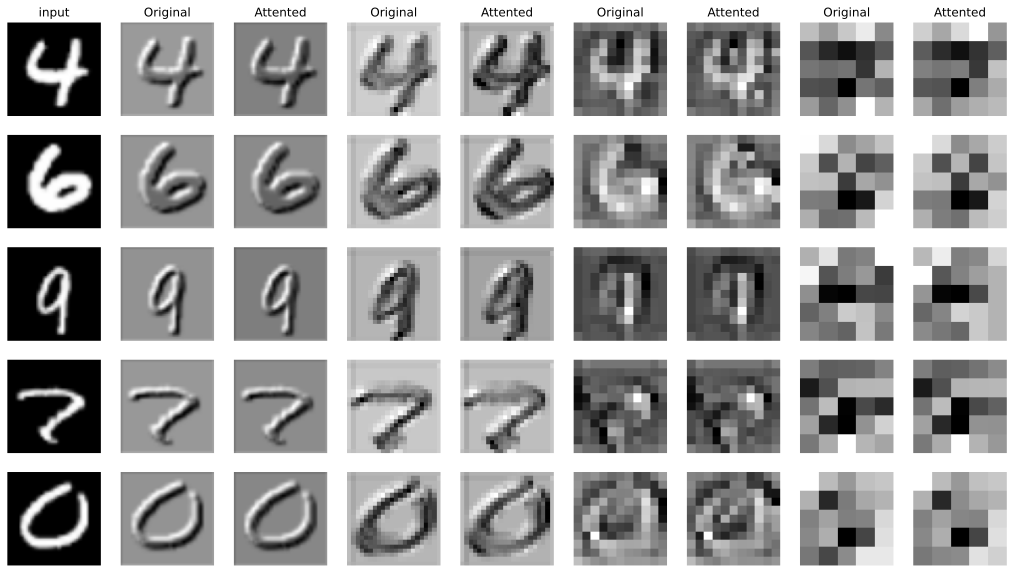

In [33]:
get_ipython().magic(u'matplotlib inline')
get_ipython().magic(u"config InlineBackend.figure_format = 'svg'")
visualize_attention(att_net, test_loader)

In [34]:
def visualize_rec(model, test_loader, save_path='results/', save_plot=False):
    for (batch_inputs, batch_labels) in test_loader:
        batch_inputs = Variable(batch_inputs)
        batch_labels = Variable(batch_labels)
        if CUDA:
            batch_inputs = batch_inputs.cuda()
            batch_labels = batch_labels.cuda()
        logits, batch_recs = model(batch_inputs)
        _, pred = torch.max(logits, dim=1)
        plt.figure(figsize=[10, 4])
        for i in range(5):
            plt.subplot(2, 5, i+1)
            plt.title(pred[i].data.cpu().numpy())
            plt.axis('off')
            plt.imshow(-batch_inputs[i, 0].data.cpu().numpy(), cmap='gray')
            plt.subplot(2, 5, i+6)
            plt.axis('off')
            plt.imshow(-batch_recs[i, 0].data.cpu().numpy(), cmap='gray')
        
        if save_plot:
            if not os.path.isdir(save_path):
                os.makedirs(save_path)
            plt.savefig(save_path+'attention.pdf', bbox_inches='tight')
        break

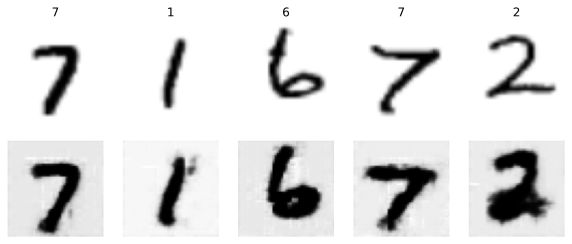

In [35]:
visualize_rec(rec_net, test_loader)